# Extract runtimes from `SLiM` ouput files

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [179]:
#def readslimruntime(numout):
numout = 51

def slimelapstime(numout):
    with open("out" + str(numout) + ".txt") as input_data:
        for line in input_data:
            if line.split(": ")[0] == "#Elapsed time":
                elapstime = float(line.split(": ")[1])
                break
    return elapstime

### Check linearity of `SLiM` runtime vs. numdemes

In [216]:
numout = np.append(np.arange(51,60),[510,50,100])
elapstime = np.arange(len(numout))

for i in elapstime:
    elapstime[i] = slimelapstime(numout[i])
    

numdemes [  7   9  11  13  15  17  19  21  23  25  50 100]
elapstime [ 18  25  36  42  52  65  73  83  96 103 223 477]


Text(0.5,1,'`SLiM` elapsed time vs. numdemes ( tau = 20,000 )')

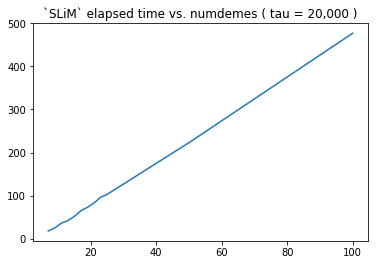

In [217]:
numdemes= np.append(np.arange(7,27,2),[50,100])
print("numdemes",numdemes)
plt.plot(numdemes,elapstime)
print("elapstime", elapstime)
plt.title("`SLiM` elapsed time vs. numdemes ( tau = 20,000 )")

### Find slope from linear regression

In [4]:
numdemes = [7,9,11,13,14,17,19,21,23,25,50,100]
elapstime = [18,25,36,42,52,65,73,83,96,103,223,477]

np.polyfit(numdemes,elapstime,1)

array([  4.94233042, -19.51500827])

In [16]:
x = np.append(np.arange(7,27,2),[50,100])
y = 5*x - 20
(y - elapstime)**2 /elapstime

array([0.5       , 0.        , 0.02777778, 0.21428571, 0.17307692,
       0.        , 0.05479452, 0.04819277, 0.01041667, 0.03883495,
       0.21973094, 0.01886792])